In [1]:
# Code by Sanket More
# Regression Example
# Not using standard models
# Uses ski kit learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
#step 1 
#read csv
df = pd.read_csv("quality.csv")

In [5]:
df.head() #displays top rows

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [6]:
df = df.drop("MemberID", axis=1) 
#drops mentioned column, by default python tries to operate on row level
#to make sure that it drops column axis=1 has to be used. 

In [7]:
df.head() #shows head

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   InpatientDays         131 non-null    int64  
 1   ERVisits              131 non-null    int64  
 2   OfficeVisits          131 non-null    int64  
 3   Narcotics             131 non-null    int64  
 4   DaysSinceLastERVisit  131 non-null    float64
 5   Pain                  131 non-null    int64  
 6   TotalVisits           131 non-null    int64  
 7   ProviderCount         131 non-null    int64  
 8   MedicalClaims         131 non-null    int64  
 9   ClaimLines            131 non-null    int64  
 10  StartedOnCombination  131 non-null    bool   
 11  AcuteDrugGapSmall     131 non-null    int64  
 12  PoorCare              131 non-null    int64  
dtypes: bool(1), float64(1), int64(11)
memory usage: 12.5 KB


In [9]:
X = df.drop('PoorCare', axis = 1)

In [59]:
df.PoorCare.value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

In [10]:
y = df['PoorCare']

In [11]:
X.shape

(131, 12)

In [12]:
y.shape

(131,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression - F 1 0.85, 0.57, 0.79

In [14]:
lr_regressor = LogisticRegression()
parameters = {
    'class_weight':['balanced'],
#       'penalty':['l1'],
       'solver':['liblinear'],
    'C': [0.1,0.13,0.15,0.17,0.19,0.2],
#    'kernel':['poly', 'rbf', 'sigmoid'],
 #   'degree' : [1,2,3,4],
     'max_iter':[10000]
    
}
model = GridSearchCV(estimator =lr_regressor, param_grid = parameters, cv = 5, scoring = 'f1' )

model_cv=model.fit(X_train,y_train)
y_predict = model_cv.predict(X_test)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.50      0.67      0.57         9

    accuracy                           0.78        40
   macro avg       0.70      0.74      0.71        40
weighted avg       0.80      0.78      0.79        40

[[25  6]
 [ 3  6]]


# Lasso regression - F 1 0.85, 0.57, 0.79

In [16]:
lr_regressor = LogisticRegression()
parameters = {
    'class_weight':['balanced'],
       'penalty':['l1'],
       'solver':['liblinear'],
    'C': [0.1,0.13,0.15,0.17,0.19,0.2],
#    'kernel':['poly', 'rbf', 'sigmoid'],
 #   'degree' : [1,2,3,4],
     'max_iter':[10000]
    
}
model = GridSearchCV(estimator =lr_regressor, param_grid = parameters, cv = 5, scoring = 'f1' )

model_cv=model.fit(X_train,y_train)
y_predict = model_cv.predict(X_test)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.50      0.67      0.57         9

    accuracy                           0.78        40
   macro avg       0.70      0.74      0.71        40
weighted avg       0.80      0.78      0.79        40

[[25  6]
 [ 3  6]]


# Ridge regression - F 1 0.89, 0.59, 0.82

In [17]:
Ridge_classifier = RidgeClassifier()
parameters = {
    'class_weight':['balanced'],
       #'penalty':['l1'],
       #'solver':['liblinear'],
    'alpha': [0.1,0.2,0.3,0.4,0.5,1,100,1000,10000],
#    'kernel':['poly', 'rbf', 'sigmoid'],
 #   'degree' : [1,2,3,4],
    # 'max_iter':[10000]
    
}
model = GridSearchCV(estimator =Ridge_classifier, param_grid = parameters, cv = 5, scoring = 'recall' )

model_cv=model.fit(X_train,y_train)
y_predict = model_cv.predict(X_test)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.62      0.56      0.59         9

    accuracy                           0.82        40
   macro avg       0.75      0.73      0.74        40
weighted avg       0.82      0.82      0.82        40

[[28  3]
 [ 4  5]]


In [18]:
model_cv.best_params_

{'alpha': 100, 'class_weight': 'balanced'}

In [19]:
Ridge_classifier = RidgeClassifier(alpha= 100, class_weight='balanced')
model_cv=Ridge_classifier.fit(X_train,y_train)
y_predict = model_cv.predict(X_test)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.62      0.56      0.59         9

    accuracy                           0.82        40
   macro avg       0.75      0.73      0.74        40
weighted avg       0.82      0.82      0.82        40

[[28  3]
 [ 4  5]]


In [20]:
model_cv.coef_

array([[ 0.01123713, -0.02771082,  0.02441546,  0.01833022, -0.00055829,
        -0.00243307,  0.00794177,  0.01158075, -0.00448006, -0.00031407,
         0.02617158,  0.04047104]])

In [22]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc =  scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [23]:
X_train_sc.head()

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall
0,-0.520612,0.223183,-0.006424,-0.533803,-1.636634,-0.707464,-0.210441,-0.480294,-0.516896,-0.645228,-0.214423,-0.655418
1,-0.520612,-0.679468,1.396621,-0.533803,0.923461,-0.707464,0.625810,-0.976961,0.038023,-0.623138,-0.214423,-0.655418
2,-0.344494,-0.228142,0.578178,-0.104875,-0.555787,0.061648,0.207684,0.300184,1.147860,1.331846,-0.214423,-0.655418
3,0.359977,0.223183,-1.292549,-0.533803,-1.662456,-0.752706,-0.712192,-0.125531,-0.875960,-0.457462,-0.214423,-0.655418
4,1.240567,2.028484,0.812019,-0.426571,-1.216100,-0.345529,1.545686,1.364471,2.355623,1.751560,-0.214423,0.429001


# Lasso with scaled F1 - 0.87, 0.56, 0.80

In [24]:
lr_regressor = LogisticRegression()
parameters = {
    'class_weight':['balanced'],
       'penalty':['l1'],
       'solver':['liblinear'],
    'C': [0.1,0.13,0.15,0.17,0.19,0.2],
#    'kernel':['poly', 'rbf', 'sigmoid'],
 #   'degree' : [1,2,3,4],
     'max_iter':[10000]
    
}
model = GridSearchCV(estimator =lr_regressor, param_grid = parameters, cv = 5, scoring = 'f1' )

model_cv=model.fit(X_train_sc,y_train)
y_predict = model_cv.predict(X_test_sc)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.56      0.56      0.56         9

    accuracy                           0.80        40
   macro avg       0.71      0.71      0.71        40
weighted avg       0.80      0.80      0.80        40

[[27  4]
 [ 4  5]]


# Logistic with scaled - F1 0.89 , 0.59, 0.82

In [25]:
lr_regressor = LogisticRegression()
parameters = {
    'class_weight':['balanced'],
#       'penalty':['l1'],
       'solver':['liblinear'],
    'C': [0.1,0.13,0.15,0.17,0.19,0.2],
#    'kernel':['poly', 'rbf', 'sigmoid'],
 #   'degree' : [1,2,3,4],
     'max_iter':[10000]
    
}
model = GridSearchCV(estimator =lr_regressor, param_grid = parameters, cv = 5, scoring = 'f1' )

model_cv=model.fit(X_train_sc,y_train)
y_predict = model_cv.predict(X_test_sc)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.62      0.56      0.59         9

    accuracy                           0.82        40
   macro avg       0.75      0.73      0.74        40
weighted avg       0.82      0.82      0.82        40

[[28  3]
 [ 4  5]]


# ===============================================
# Trying Random forest. but did not give best results
#### F1 0.81, 0.33, 0.7

In [38]:
random_forest_classifier = RandomForestClassifier()


parameters = {
    'class_weight':['balanced'],
#    'n_estimators': [100,200,500,1000],
    'n_estimators': [5,10,15,30],    
    'criterion':['gini', 'entropy'],
#    'min_samples_leaf' : [5,10,20,50]
    'min_samples_leaf' : [7,8,10,15,20]
    
}
model = GridSearchCV(estimator =random_forest_classifier,param_grid = parameters, cv = 5, scoring = 'f1' )
model_cv=model.fit(X_train_sc,y_train)
y_predict = model_cv.predict(X_test_sc)
#print("C is :", i/10)
    #print(model.coef_)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(model.best_estimator_)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.43      0.33      0.38         9

    accuracy                           0.75        40
   macro avg       0.62      0.60      0.61        40
weighted avg       0.73      0.75      0.74        40

[[27  4]
 [ 6  3]]
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=8, n_estimators=10)


# Ridge with scaled - f1- 0.91, 0.63, 0.84 - best score

In [51]:
# higher alphas specify stronger regularization
Ridge_classifier = RidgeClassifier()
parameters = {
    'class_weight':['balanced'],
       #'penalty':['l1'],
       #'solver':['liblinear'],
    'alpha': [0.1,0.2,0.3,0.4,0.5,1,100,200,1000,10000],
#    'kernel':['poly', 'rbf', 'sigmoid'],
 #   'degree' : [1,2,3,4],
    # 'max_iter':[10000]
    
}
model = GridSearchCV(estimator =Ridge_classifier, param_grid = parameters, cv = 5, scoring = 'recall' )

model_cv=model.fit(X_train_sc,y_train)
y_predict = model_cv.predict(X_test_sc)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
model_cv.best_params_

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.71      0.56      0.63         9

    accuracy                           0.85        40
   macro avg       0.80      0.75      0.77        40
weighted avg       0.84      0.85      0.84        40

[[29  2]
 [ 4  5]]


{'alpha': 100, 'class_weight': 'balanced'}

In [27]:
Ridge_classifier = RidgeClassifier(alpha= 100, class_weight='balanced')
model_cv=Ridge_classifier.fit(X_train_sc,y_train)
y_predict = model_cv.predict(X_test_sc)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.71      0.56      0.63         9

    accuracy                           0.85        40
   macro avg       0.80      0.75      0.77        40
weighted avg       0.84      0.85      0.84        40

[[29  2]
 [ 4  5]]


In [28]:
model_cv.score(X,y) #shows the R-square 

0.6870229007633588

In [29]:
model_cv.coef_ #shows the coeffecient of all the variable

array([[ 0.00957927,  0.01127011,  0.09943135,  0.111898  , -0.04317481,
        -0.00049933,  0.07775305,  0.06636425, -0.01165226,  0.00402274,
         0.07531107,  0.10858788]])

In [30]:
X.columns #shows the columns 

Index(['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall'],
      dtype='object')

In [31]:
#Imp positive columns - ERVisits, OfficeVisits, Narcotics, TotalVisits, 

In [32]:
dftemp = pd.DataFrame(model_cv.coef_)
dftemp.columns =['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall']
dftemp = dftemp.T
dftemp

,0
InpatientDays,0.009579
ERVisits,0.011270
OfficeVisits,0.099431
Narcotics,0.111898
DaysSinceLastERVisit,-0.043175
Pain,-0.000499
TotalVisits,0.077753
ProviderCount,0.066364
MedicalClaims,-0.011652
ClaimLines,0.004023


In [33]:
dftemp = dftemp.sort_values(by = 0,axis=0)

In [34]:
dftemp.index

Index(['DaysSinceLastERVisit', 'MedicalClaims', 'Pain', 'ClaimLines',
       'InpatientDays', 'ERVisits', 'ProviderCount', 'StartedOnCombination',
       'TotalVisits', 'OfficeVisits', 'AcuteDrugGapSmall', 'Narcotics'],
      dtype='object')

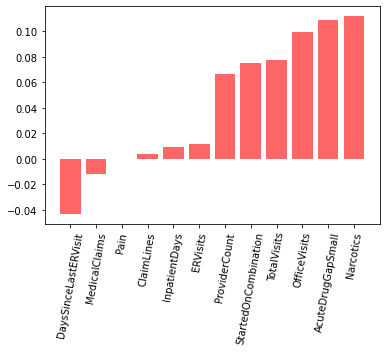

In [58]:
#dftemp.plot.bar()
plt.bar(dftemp.index,
        color='red', height = dftemp[0], alpha = 0.6)
plt.xticks( rotation=80)
plt.show()

# Conclusion
---Y column is Poor care. Therefore, higher the value, bad it is for the business
---Therefore, Provider Count, Started on Combination, Total Visits, Office Visits, Acute Drug Gap, Narcotics features add to the Poor Care outcome
Days since last ER Visit and Medical Claims better the experience for customers